# Voltage Sag

This notebook shows the simulated voltage sag events, caused by 1) motor start, and 2) fault.

In [1]:
import matplotlib.pyplot as plt

import andes

In [2]:
!andes misc --version

Python  3.12.0
andes   1.9.3
numpy   1.26.0
kvxopt  1.3.2.1
sympy   1.13.3
scipy   1.13.1
pandas  2.2.2
numba   0.60.0


In [3]:
%matplotlib inline

In [4]:
andes.config_logger(stream_level=30)

<img src="./third-order-motor.png"
     alt="third-order-motor.png"
     width="500"
     caption="Third-order motor"
/>

<img src="./fifth-order-motor.png"
     alt="fifth-order-motor.png"
     width="500"
     caption="Fifth-order motor"
/>

Excerpted from _F. Milano, Power System Modelling and Scripting. Springer Nature, 2010._

For case1, we can add a motor to Bus5, and a Toggle to start it at 0.1s.

In [5]:
s1 = andes.load(andes.get_case('ieee14/ieee14_full.xlsx'),
                setup=False, no_output=True, default_config=True)

s1.add(model='Motor5', param_dict=dict(bus=5, Vn=69, fn=60, u=0,
                                       name='Motor 1', idx='Motor5_1',
                                       rs=0.01, xs=0.15,
                                       rr1=0.05, xr1=0.15,
                                       rr2=0.001, xr2=0.04,
                                       xm=5, Hm=3,
                                       c1=0.1, c2=0.02, c3=0.02, zb=1))

s1.add(model='Toggle', param_dict=dict(model='Motor5', dev='Motor5_1', t=1))

s1.setup()

Generating code for 1 models on 12 processes.


True

For case2, there is a three-phase-to-ground fault at 1s.

In [6]:
s2 = andes.load(andes.get_case('ieee14/ieee14_fault.xlsx'),
                setup=True, no_output=True, default_config=True)

Generating code for 1 models on 12 processes.


In [7]:
for ss in [s1, s2]:
    ss.PFlow.run()
    _ = ss.TDS.init()
    ss.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle Toggle_1>: Motor5.Motor5_1 status changed to 1 at t=1.0 sec.


  0%|          | 0/100 [00:00<?, ?%/s]

<Fault 1>: Applying fault on Bus (idx=9) at t=1.0 sec.
<Fault 1>: Clearing fault on Bus (idx=9) at t=1.1 sec.


(<Figure size 1800x750 with 2 Axes>,
 <Axes: xlabel='Time [s]', ylabel='Voltage [p.u.]'>)

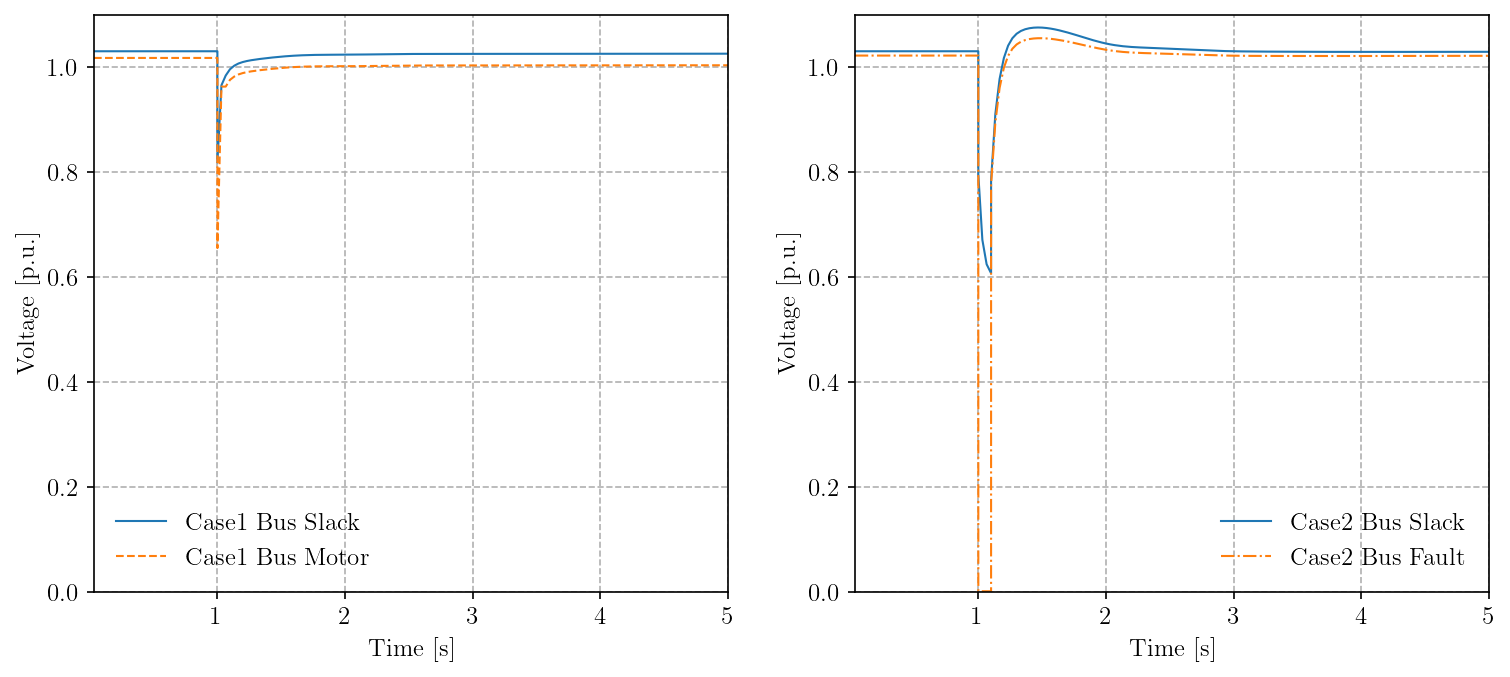

In [9]:
fig, ax = plt.subplots(1, 2, dpi=150, figsize=(12, 5))

s1.TDS.plt.plot(s1.Bus.v,
                fig=fig, ax=ax[0],
                a=(0, 4,),
                grid=True, ylabel='Voltage [p.u.]',
                yheader=['Case1 Bus Slack', 'Case1 Bus Motor'],
                show=False,
                ymin=-0.001, ymax=1.1, right=5)

s2.TDS.plt.plot(s2.Bus.v,
                fig=fig, ax=ax[1],
                a=(0, 8,),
                grid=True, ylabel='Voltage [p.u.]',
                linestyles=['-', '-.'],
                yheader=['Case2 Bus Slack', 'Case2 Bus Fault'],
                show=False,
                ymin=-0.001, ymax=1.1, right=5)